### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.metrics import mean_squared_error


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = pd.read_csv('univ_data.csv')
timeseries_data = list(timeseries_data['close'])
# choose a number of time steps
n_steps = 20
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[0.86393 0.86397 0.86378 ... 0.86373 0.86363 0.86387]
 [0.86397 0.86378 0.86385 ... 0.86363 0.86387 0.8639 ]
 [0.86378 0.86385 0.86384 ... 0.86387 0.8639  0.86393]
 ...
 [0.83246 0.83279 0.83321 ... 0.83305 0.83304 0.83321]
 [0.83279 0.83321 0.83312 ... 0.83304 0.83321 0.83303]
 [0.83321 0.83312 0.83316 ... 0.83321 0.83303 0.83305]]
[0.8639  0.86393 0.8636  ... 0.83303 0.83305 0.83323]


(None, None)

In [5]:
X.shape

(89980, 20)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit model
model.fit(X, y, epochs=20, verbose=1, shuffle=False)


##### Sauvegarde du model

In [23]:
model.save('univ_v1_model.h5')

##### Chargement du model

In [8]:
model.load_weights('univ_v1_model.h5')

### Predicting For the next 10 data

In [9]:
# demonstrate prediction for next 10 days
x_input = np.array([0.83321, 0.83312, 0.83316, 0.83299, 0.83288, 0.83323, 0.83357, 0.83379, 0.83386, 0.83394, 0.83374, 0.8336, 0.83272, 0.83226, 0.8328, 0.83305, 0.83304, 0.83321, 0.83303, 0.83305, 0.83323])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} candle input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} candle output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

0 candle input [0.83312 0.83316 0.83299 0.83288 0.83323 0.83357 0.83379 0.83386 0.83394
 0.83374 0.8336  0.83272 0.83226 0.8328  0.83305 0.83304 0.83321 0.83303
 0.83305 0.83323]
0 candle output [[0.83270466]]
1 candle input [0.83316    0.83299    0.83288    0.83323    0.83357    0.83379
 0.83386    0.83394    0.83374    0.8336     0.83272    0.83226
 0.8328     0.83305    0.83304    0.83321    0.83303    0.83305
 0.83323    0.83270466]
1 candle output [[0.8327079]]
2 candle input [0.83299    0.83288    0.83323    0.83357    0.83379    0.83386
 0.83394    0.83374    0.8336     0.83272    0.83226    0.8328
 0.83305    0.83304    0.83321    0.83303    0.83305    0.83323
 0.83270466 0.83270788]
2 candle output [[0.83270717]]
3 candle input [0.83288    0.83323    0.83357    0.83379    0.83386    0.83394
 0.83374    0.8336     0.83272    0.83226    0.8328     0.83305
 0.83304    0.83321    0.83303    0.83305    0.83323    0.83270466
 0.83270788 0.83270717]
3 candle output [[0.83270717]]
4 c

In [16]:
lst_output

[0.83270466,
 0.8327079,
 0.83270717,
 0.83270717,
 0.8327067,
 0.83270633,
 0.8327061,
 0.83270574,
 0.8327056,
 0.8327055]

### Visualizaing The Output

In [17]:
import matplotlib.pyplot as plt

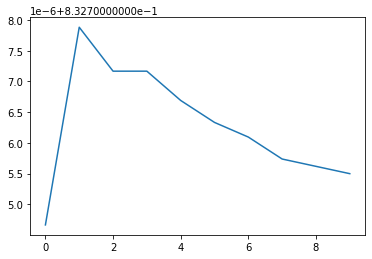

In [18]:
#plt.plot(day_new,timeseries_data)
plt.plot(lst_output)